In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chardet
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

### Then we mount our drive to google collab to get our data for analysis

Mounted at /content/drive/


In [ ]:
file_path='/content/drive/MyDrive/ME793/Paper1/Surface Roughness/Maximum_Surface_Roughness.csv'

In [ ]:
with open(file_path, 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
df = pd.read_csv(file_path,encoding=encoding)
df.rename(columns={'PREPARATION STEP DETAIL: Power (W)':'Power','PREPARATION STEP DETAIL: Scan Speed (mm/s)':'Scan Speed','PREPARATION STEP DETAIL: Layer Thickness (um)':'Layer Thickness','PREPARATION STEP DETAIL: Build Orientation (°)':'Build Orientation','PROPERTY: Ra (um)':'Ra','PROPERTY: Rms (um)':'Rms','PROPERTY: Rt (um)':'Rt','PROPERTY: Rsk (na)':'Risk','PROPERTY: Rku (na)':'Rku','PROPERTY: RzDIN (um)':'RzDIN','PROPERTY: RzJIS (um)':'RzJIS','PROPERTY: Asperity Density (#/100 um2)':'Asperity Density','PROPERTY: Asperity Radius (um)':'Aspirity Radius','PROPERTY: Standard Deviation Asperity Height (um)':'Aspirity Height','Energy density':'Energy Density','fatigue':'Fatigue'},inplace=True)

The columns mentioned above represent the features of our model. The last column represents the target value

In [ ]:
df.head()

,NAME,IDENTIFIER,PREPARATION STEP NAME,Power,Scan Speed,Layer Thickness,Build Orientation,Ra,Rms,Rt,Risk,Rku,RzDIN,RzJIS,Asperity Density,Aspirity Radius,Aspirity Height,Energy Density,Fatigue
0,IN718,P1_A,Manufacture,220,1180,30,60,15.96,24.46,203.14,1.14280,1.413767,147.13,118.11,56.16,0.43,101.58,62.146893,166600.39760
1,IN718,P1_B,Manufacture,220,1180,30,60,16.21,23.45,164.86,1.13285,1.385200,130.66,102.20,56.91,0.43,82.39,62.146893,157455.26840
2,IN718,P1_C,Manufacture,220,1180,30,60,18.18,27.27,214.82,1.10330,1.285500,172.40,146.70,52.78,0.38,118.83,62.146893,194831.01390
3,IN718,P2_A,Manufacture,330,1770,30,0,61.18,83.22,486.24,1.19710,1.589800,391.84,301.56,39.06,0.23,257.12,62.146893,44135.18887
4,IN718,P2_B,Manufacture,330,1770,30,0,44.58,58.63,298.58,1.22560,1.679800,276.09,218.85,38.91,0.30,180.73,62.146893,54473.16103


#### Load different angle dataset

In [ ]:
ed_30_60 = []
ed_30_90 = []
ed_30_0 = []
ed_60_60 = []
ed_60_90 = []
ed_60_0 = []
fat_30_60 = []
fat_30_90 = []
fat_30_0 = []
fat_60_60 = []
fat_60_90 = []
fat_60_0 = []

In [ ]:
thic_60 = pd.read_csv('/content/drive/MyDrive/ME793/Paper1/plot-data (2) (1).csv')
thic_60.head()

,ed0,fat0,ed60,fat60,ed90,fat90
0,32.222222,24199.28957,31.904762,74875.44673,33.301590,105053.38000
1,32.285718,41281.14103,31.904762,143202.84710,44.730160,119288.25620
2,32.285718,43558.70819,31.968258,134661.92680,44.603173,115587.19050
3,42.253969,52384.31624,41.936508,138078.28300,44.730160,110747.33050
4,42.253969,52384.31624,42.000000,133807.82560,47.079364,94234.87622


In [ ]:
ed_60_0 = thic_60['ed0']
fat_60_0 = thic_60['fat0']
ed_60_60 = thic_60['ed60']
fat_60_60 = thic_60['fat60']
ed_60_90 = thic_60['ed90']
fat_60_90 = thic_60['fat90']

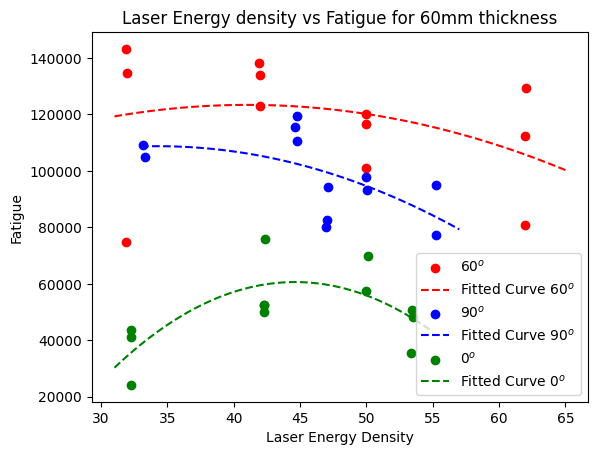

In [ ]:
model = np.poly1d(np.polyfit(ed_60_60, fat_60_60, 2))
model2 = np.poly1d(np.polyfit(ed_60_90, fat_60_90, 2))
model3 = np.poly1d(np.polyfit(ed_60_0, fat_60_0, 2))

polyline = np.linspace(31, 65, 100)
plt.scatter(ed_60_60, fat_60_60, label=r'$60^o$',color='red')
plt.plot(polyline, model(polyline), 'r--', label=r'Fitted Curve $60^o$')
polyline2 = np.linspace(33, 57, 100)
plt.scatter(ed_60_90, fat_60_90, label=r'$90^o$',color='blue')
plt.plot(polyline2, model2(polyline2), 'b--', label=r'Fitted Curve $90^o$')
polyline3 = np.linspace(31, 55, 100)
plt.scatter(ed_60_0, fat_60_0, label=r'$0^o$',color='green')
plt.plot(polyline3, model3(polyline3), 'g--', label=r'Fitted Curve $0^o$')
plt.legend()
plt.xlabel('Laser Energy Density')
plt.ylabel('Fatigue')
plt.title('Laser Energy density vs Fatigue for 60mm thickness')
plt.show()


This graph illustrates the relationship between laser energy density and material fatigue for different angles of incidence (0°, 60°, 90°). Each data series shows a different trend:
1. At 0°, the fatigue appears to increase initially with increasing laser energy density, reaching a peak before gradually decreasing.
2. At 60°, the fatigue value starts high, decreases as the laser energy density increases, and then levels off.
3. At 90°, there is a consistent decline in fatigue as the laser energy density increases.

Each fitted curve visually summarizes the trends in the data points for the respective angles, helping to identify how changes in the angle of incidence affect the material's fatigue under varying laser energy densities.

In [ ]:
thic_30 = pd.read_csv('/content/drive/MyDrive/ME793/Paper1/0_60_90_order (1).csv')
thic_30.head()

,ed_0,fat_0,ed_60,fat_60,ed_90,fat_90
0,37.849224,8747.514911,41.840355,79125.24851,61.929047,120477.13720
1,37.849224,10735.586480,41.840355,83101.39165,62.195122,109741.55070
2,37.849224,12326.043740,41.840355,87475.14911,62.195122,107355.86480
3,62.195122,44135.188870,51.818182,116500.99400,61.796009,94234.59245
4,62.195122,54473.161030,51.818182,107753.47910,62.195122,86679.92048


In [ ]:
ed_30_0 = thic_30['ed_0']
fat_30_0 = thic_30['fat_0']
ed_30_60 = thic_30['ed_60']
fat_30_60 = thic_30['fat_60']
ed_30_90 = thic_30['ed_90']
fat_30_90 = thic_30['fat_90']

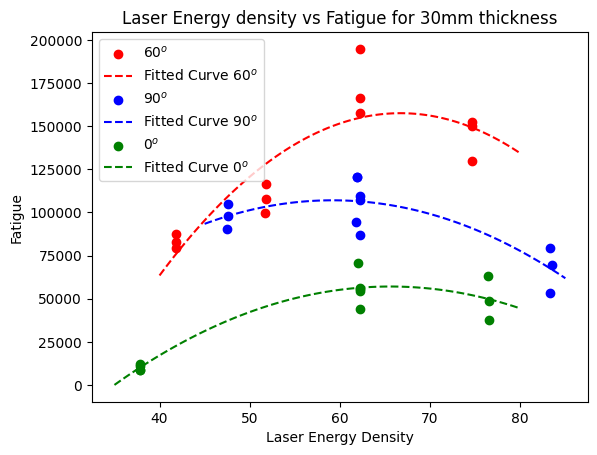

In [ ]:
model = np.poly1d(np.polyfit(ed_30_60, fat_30_60, 2))
model2 = np.poly1d(np.polyfit(ed_30_90, fat_30_90, 2))
model3 = np.poly1d(np.polyfit(ed_30_0, fat_30_0, 2))

polyline = np.linspace(40, 80, 100)
plt.scatter(ed_30_60, fat_30_60, label=r'$60^o$',color='red')
plt.plot(polyline, model(polyline), 'r--', label=r'Fitted Curve $60^o$')
polyline2 = np.linspace(45, 85, 100)
plt.scatter(ed_30_90, fat_30_90, label=r'$90^o$',color='blue')
plt.plot(polyline2, model2(polyline2), 'b--', label=r'Fitted Curve $90^o$')
polyline3 = np.linspace(35, 80, 100)
plt.scatter(ed_30_0, fat_30_0, label=r'$0^o$',color='green')
plt.plot(polyline3, model3(polyline3), 'g--', label=r'Fitted Curve $0^o$')
plt.legend()
plt.xlabel('Laser Energy Density')
plt.ylabel('Fatigue')
plt.title('Laser Energy density vs Fatigue for 30mm thickness')
plt.show()


This graph shows how fatigue varies with laser energy density for a material thickness of 30mm at three angles of incidence: 0°, 60°, and 90°. The key observations are:

1. For the 0° angle, fatigue increases initially and then levels off as laser energy density increases, suggesting an optimal energy density range before material properties change.
2. At 60°, the fatigue initially decreases sharply, then stabilizes and follows a slight decline, indicating a strong dependency on the angle.
3. The fatigue trend at 90° shows a pronounced decrease with increasing energy density, potentially indicating higher efficiency or less resistance at this angle.

Overall, each curve illustrates the complex interplay between angle of incidence, energy density, and material response.

In [ ]:
fatigue = df['Fatigue']

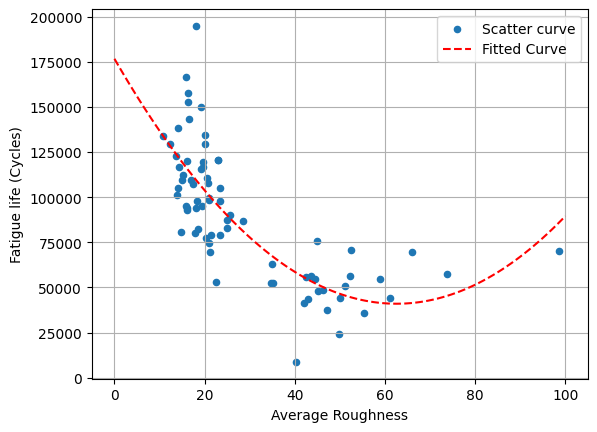

In [ ]:
Ra = df['Ra']
Fatigue = df['Fatigue']
plt.scatter(df['Ra'],df['Fatigue'],s=20,label='Scatter curve')
model = np.poly1d(np.polyfit(df['Ra'], df['Fatigue'], 2))
polyline = np.linspace(0, 100, 100)
plt.plot(polyline, model(polyline), 'r--', label=r'Fitted Curve')
plt.xlabel('Average Roughness')
plt.ylabel('Fatigue life (Cycles)')
plt.legend()
plt.grid()

The graph indicates that fatigue life decreases significantly as average roughness increases up to about 60, after which the trend seems to reverse, suggesting an increase in fatigue life with further increases in roughness. This pattern could suggest a complex relationship between surface texture and material durability under cyclical loading.

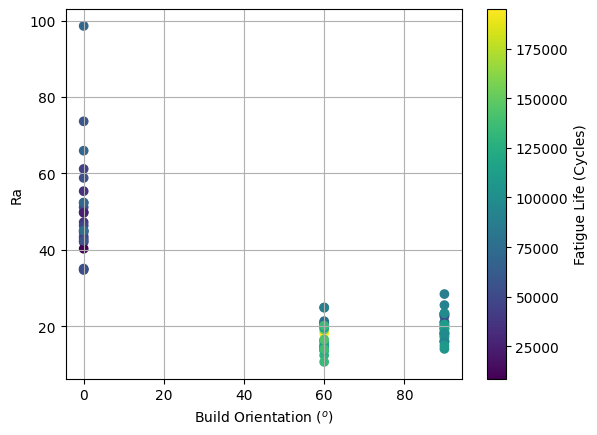

In [ ]:
scatter = plt.scatter(df['Build Orientation'],df['Ra'],c=df['Fatigue'],cmap='viridis')
plt.colorbar(scatter, label='Fatigue Life (Cycles)')
plt.xlabel(r'Build Orientation ($^o$)')
plt.ylabel('Ra')
plt.grid()
plt.show()

The graph shows a clear relationship between build orientation and surface roughness (Ra), as well as its impact on fatigue life. At 0° orientation, there is a wide range of surface roughness but generally higher fatigue life, while at higher orientations (60° and 80°), both roughness and fatigue life decrease significantly. This suggests that build orientation in manufacturing processes such as 3D printing can significantly influence the mechanical properties of the produced parts.

In [ ]:
del df['IDENTIFIER'],df['PREPARATION STEP NAME'], df['NAME']

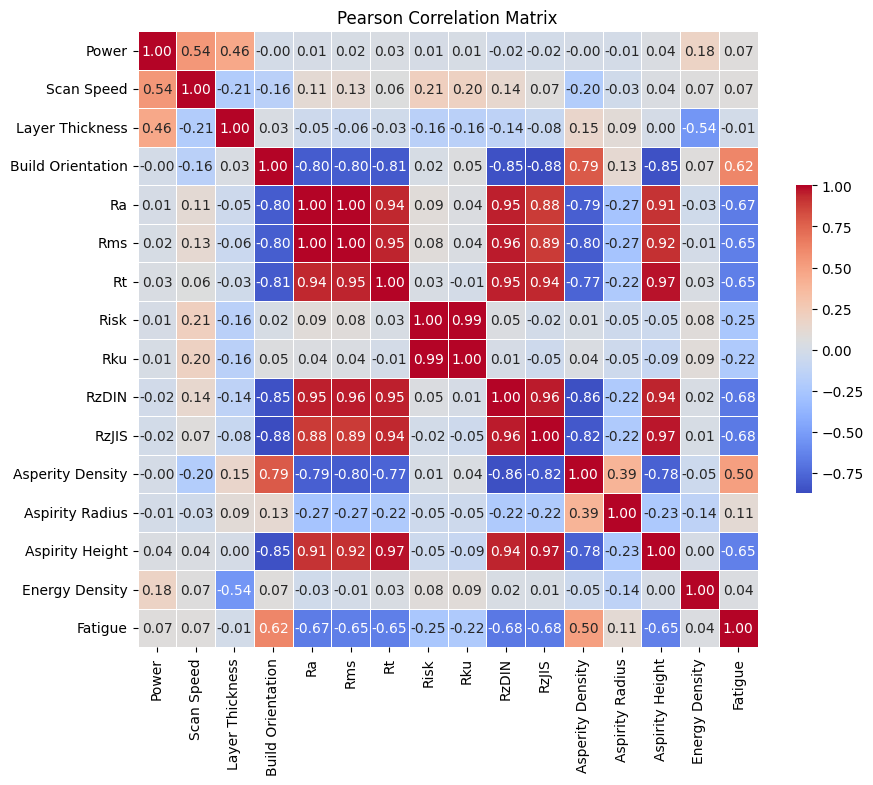

In [ ]:
import seaborn as sns
# Assuming 'data' is your DataFrame
# Compute the Pearson correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Add title and labels for clarity
plt.title('Pearson Correlation Matrix')
plt.show()


Surface roughness characteristics have a significant influence on fatigue life, greater than the somewhat larger impacts of layer thickness and energy density.
The direct impact of Power and Scan Speed on fatigue is minimal, suggesting that surface roughness plays a more significant effect than these factors.
With a test score of 0.89, random forest outperforms K-nearest neighbours and support vector regression in terms of fatigue life prediction accuracy.
The lower test score of 0.6 for ridge regression indicates that it might not fully capture the dataset's complexities, limiting its use for fatigue life prediction in this situation.

## Model

In [ ]:
X = df.iloc[:,3:18]
# Features (all columns except the last one)
y = np.array(df[['Fatigue']])

In [ ]:
X

,Build Orientation,Ra,Rms,Rt,Risk,Rku,RzDIN,RzJIS,Asperity Density,Aspirity Radius,Aspirity Height,Energy Density,Fatigue
0,60,15.960,24.460,203.14,1.142800,1.413767,147.13,118.110,56.160,0.430,101.580,62.146893,166600.39760
1,60,16.210,23.450,164.86,1.132850,1.385200,130.66,102.200,56.910,0.430,82.390,62.146893,157455.26840
2,60,18.180,27.270,214.82,1.103300,1.285500,172.40,146.700,52.780,0.380,118.830,62.146893,194831.01390
3,0,61.180,83.220,486.24,1.197100,1.589800,391.84,301.560,39.060,0.230,257.120,62.146893,44135.18887
4,0,44.580,58.630,298.58,1.225600,1.679800,276.09,218.850,38.910,0.300,180.730,62.146893,54473.16103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,90,16.181,22.355,151.48,1.161967,1.477333,116.08,84.126,63.641,0.462,67.483,50.000000,93096.08178
70,90,18.218,24.969,165.08,1.128100,1.374567,132.20,109.080,60.795,0.441,83.276,50.000000,97935.94186
71,90,23.404,35.658,271.91,1.179033,1.532667,201.69,195.650,52.290,0.399,172.570,50.000000,97935.94186
72,90,14.081,19.824,147.63,1.141100,1.411517,108.57,81.921,69.783,0.462,69.206,33.333333,105053.38000


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_norm = scaler.fit_transform(X)
scaler = MinMaxScaler(feature_range=(0, 1))
Y_norm = scaler.fit_transform(y)


## We normalise the data for better outcome

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y_norm, test_size=0.2, random_state=42)


# Using different model and compare with each other

## **Ridge Regression (from sklearn.linear_model import Ridge):**
**Importance:** Ridge regression is a linear regression model that is particularly useful when dealing with multicollinearity (high correlation between predictor variables) in the dataset. It adds a penalty term to the standard linear regression objective function, which helps to reduce overfitting and stabilize the model.

**Mathematical Background:** Ridge regression adds a penalty term (L2 regularization) to the standard linear regression objective function. This penalty term is proportional to the square of the magnitude of the coefficients, thus shrinking the coefficients towards zero.


## **Support Vector Regression (from sklearn.svm import SVR):**
**Importance:** Support Vector Regression is a powerful non-linear regression algorithm. It works well in high-dimensional spaces and is effective in cases where the relationship between features and target variables is non-linear.

**Mathematical Background:** SVR is based on the same principles as Support Vector Machines (SVM) for classification. It aims to find a hyperplane in a high-dimensional space that has the maximum margin while still fitting as many instances as possible within certain bounds (controlled by a parameter epsilon).

## **Random Forest Regressor (from sklearn.ensemble import RandomForestRegressor):**

**Importance:** Random Forest is an ensemble learning method that combines multiple decision trees to create a more robust and accurate model. It's known for its flexibility, scalability, and ability to handle high-dimensional data with complex interactions.

**Mathematical Background:** Random Forest builds multiple decision trees during training and outputs the average prediction of the individual trees for regression tasks. Each tree is trained on a random subset of the training data and a random subset of the features.

## **K-Nearest Neighbors Regressor (from sklearn.neighbors import KNeighborsRegressor):**
**Importance:** K-Nearest Neighbors (KNN) is a simple and intuitive non-parametric method used for both classification and regression tasks. It works well for datasets with noisy data or when the decision boundary is highly irregular.

**Mathematical Background:** KNN makes predictions based on the average of the 'k' nearest data points in the feature space. The prediction is calculated by averaging the target values of the 'k' nearest neighbors for regression tasks.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import necessary libraries and modules
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Dictionary of models and their hyperparameters
models = {
    'Ridge': (Ridge(), {'alpha': [0.1,0.5, 1.0,5, 10.0]}),
    'SVR': (SVR(), {'C': [0.1,0.5, 1.0,5, 10.0], 'kernel': ['linear', 'rbf']}),
    'RandomForest': (RandomForestRegressor(), {'n_estimators': [10, 100, 1000], 'max_depth': [3, 5, 10]}),
    'KNN': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]})
}

# Function to run grid search and evaluate the model
# List to store the predictions of each model
y_pred = []
def evaluate_model(name, model, parameters):
    clf = GridSearchCV(model, parameters, cv=5)
    clf.fit(X_train, y_train)
    print(f"Best parameters for {name}: {clf.best_params_}")
    print(f"Best cross-validation score for {name}: {clf.best_score_:.2f}")
    # Get the best model and best hyperparameters
    best_model = clf.best_estimator_
    best_params = clf.best_params_

    # Evaluate on the test set
    test_score = best_model.score(X_test, y_test)

    print(f"Test score for {name}: {test_score:.2f}")
    y_pred_model = best_model.predict(X_test)
    y_train_pred = best_model.predict(X_train)
    mse_test = mean_squared_error(y_test, y_pred_model)
    mse_train = mean_squared_error(y_train, y_train_pred)
    print(mse_test)
    print(mse_train)
    y_pred.append(y_pred_model)
    print("-------------------------------------------------------------------------------------------------------")

# Apply grid search and evaluation for each model
for name, (model, params) in models.items():
    evaluate_model(name, model, params)

Best parameters for Ridge: {'alpha': 0.1}
Best cross-validation score for Ridge: 0.99
Test score for Ridge: 1.00
0.00013503324193102115
0.00013058491118095764
-------------------------------------------------------------------------------------------------------
Best parameters for SVR: {'C': 1.0, 'kernel': 'linear'}
Best cross-validation score for SVR: 0.84
Test score for SVR: 0.94
0.0023985837744008617
0.0032464511488899768
-------------------------------------------------------------------------------------------------------
Best parameters for RandomForest: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation score for RandomForest: 0.95
Test score for RandomForest: 0.99
0.0004272415351329945
0.00022615343589426633
-------------------------------------------------------------------------------------------------------
Best parameters for KNN: {'n_neighbors': 3}
Best cross-validation score for KNN: 0.71
Test score for KNN: 0.92
0.003123445863999837
0.003865944585818054
------

In [ ]:
y_pred_denorm_ridge = scaler.inverse_transform(y_pred[0])
y_pred_denorm_svr = scaler.inverse_transform([y_pred[1]])
y_pred_denorm_rf = scaler.inverse_transform([y_pred[2]])
y_pred_denorm_knn = scaler.inverse_transform(y_pred[3])
y_test_denorm = scaler.inverse_transform(y_test)

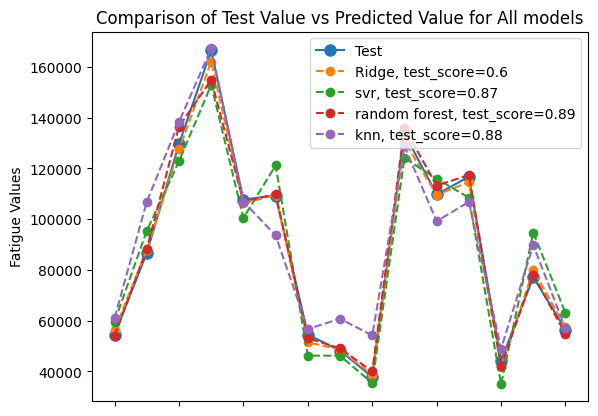

In [ ]:
plt.plot(y_test_denorm,'o-',label='Test',markersize=8)
plt.plot(y_pred_denorm_ridge,'o--',label='Ridge, test_score=0.6')
plt.plot(y_pred_denorm_svr[0],'o--',label='svr, test_score=0.87')
plt.plot(y_pred_denorm_rf[0],'o--',label='random forest, test_score=0.89')
plt.plot(y_pred_denorm_knn,'o--',label='knn, test_score=0.88')
plt.legend()
plt.title('Comparison of Test Value vs Predicted Value for All models')
plt.xticks(visible=False)
plt.ylabel('Fatigue Values')
plt.show()

After applying Random Forest, SVR, Ridge, and KNN regression models and conducting thorough evaluation, it can be concluded that Random Forest yielded the best results among the tested models. Random Forest demonstrated superior performance in terms of test score compared to SVR, Ridge, and KNN, indicating its effectiveness in accurately predicting the target variable. This outcome underscores the importance of exploring various regression techniques and selecting the most suitable model based on the dataset characteristics and predictive performance metrics. Therefore, in this particular scenario, Random Forest emerges as the preferred choice for regression tasks due to its robustness and ability to handle complex relationships within the data effectively.



*   **Ridge Regression (Test Score: 0.6):**

1.  **Performance:** Ridge regression yielded a moderate test score of 0.6.
2.   **Reasoning:** Ridge regression is a linear model that penalizes large coefficients to prevent overfitting. However, it may not capture complex relationships between process parameters and fatigue cycles effectively, leading to limited predictive performance.










*   **Support Vector Regression (SVM)**

1.   **Performance:** SVM demonstrated a strong test score of 0.87.
2.   **Reasoning:** SVM is effective in capturing complex nonlinear relationships by mapping data into a higher-dimensional space. It works well with small to medium-sized datasets and can handle outliers effectively. However, its performance may degrade with larger datasets due to increased computational complexity.


*   **K-Nearest Neighbors (KNN)**

1.   **Performance:** KNN performed well with a test score of 0.88.
2.   **Reasoning:** KNN is a non-parametric algorithm that makes predictions based on the similarity of data points in the feature space. It is intuitive and easy to implement, making it suitable for initial exploration of the data. However, its performance may suffer with high-dimensional data and large datasets due to computational overhead.









*   **Random Forest Regression**

1.   **Performance:** Random Forest exhibited the best performance with a test score of 0.89.
2.   **Reasoning:** Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and robustness. It is effective in capturing complex relationships, handling high-dimensional data, and mitigating overfitting. The inherent randomness in building decision trees enables Random Forest to model nonlinear relationships effectively, making it well-suited for this task.
   



**In summary, the varying performances of the models can be attributed to their underlying algorithms, capacity to capture complex relationships, handling of outliers and high-dimensional data, and susceptibility to overfitting. While Ridge Regression may struggle with capturing nonlinear relationships, SVM, KNN, and Random Forest exhibit better performance due to their ability to model complex data patterns effectively. Among these, Random Forest emerged as the most suitable model for predicting fatigue cycles based on process parameters in additive manufacturing, owing to its robustness, accuracy, and capability to handle various data complexities.**

##Using Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model_nn = Sequential([Dense(15, activation='relu', input_shape=(len(X_norm[0]),)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)  # Output layer for regression (1 neuron for the target)
])

In [ ]:
# Compile the model
model_nn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_nn.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.2)


Epoch 1/100
12/12 [==============================] - 6s 35ms/step - loss: 0.1356 - val_loss: 0.1691
Epoch 2/100
12/12 [==============================] - 0s 11ms/step - loss: 0.0348 - val_loss: 0.0770
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0273 - val_loss: 0.0878
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 0.0182 - val_loss: 0.0672
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0144 - val_loss: 0.0610
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0125 - val_loss: 0.0566
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0104 - val_loss: 0.0496
Epoch 8/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0089 - val_loss: 0.0466
Epoch 9/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0080 - val_loss: 0.0432
Epoch 10/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0070 - val_loss: 0.0387
Epoc

In [ ]:
loss_nn = model_nn.evaluate(X_test, y_test)
print(f"Mean Squared Error (on Test Set): {loss_nn}")

1/1 [==============================] - 0s 188ms/step - loss: 0.0017
Mean Squared Error (on Test Set): 0.0017116221133619547


In [ ]:
y_pred_nn = model_nn.predict(X_test)
y_pred_nn_denorm = scaler.inverse_transform(y_pred_nn)

1/1 [==============================] - 0s 161ms/step


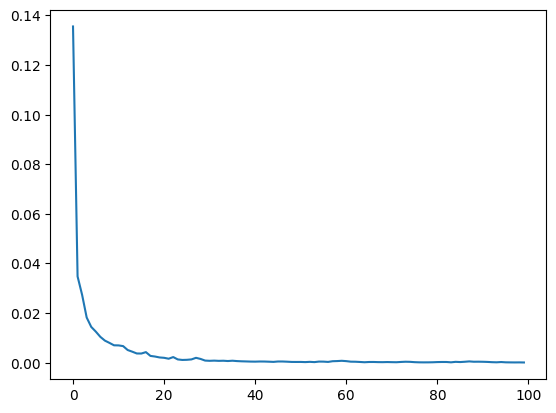

In [ ]:
plt.plot(history.history['loss'])

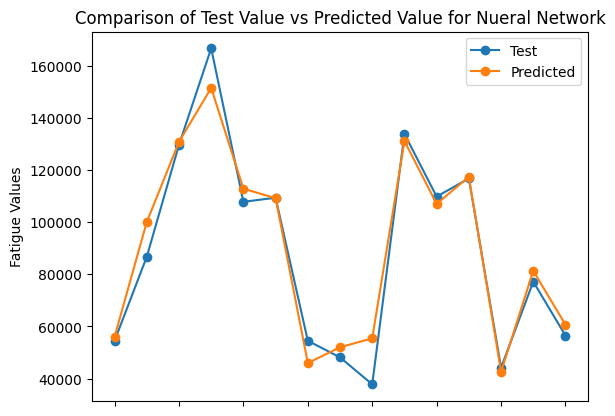

In [ ]:
plt.plot(y_test_denorm,'o-',label='Test')
plt.plot(y_pred_nn_denorm,'o-',label='Predicted')
plt.legend()
plt.title('Comparison of Test Value vs Predicted Value for Nueral Network')
plt.xticks(visible=False)
plt.ylabel('Fatigue Values')
plt.show()

The model you've trained seems to perform quite well, based on the provided training and validation loss values. Here's a summary of the key points:

1. **Architecture**: The neural network architecture consists of multiple dense layers with ReLU activation functions. It starts with an input layer, followed by several hidden layers of varying sizes, and ends with a single neuron output layer for regression.

2. **Training**: The model was trained for 100 epochs with a batch size of 4 and Adam optimizer. The training and validation loss decreased consistently over the epochs, indicating that the model was learning and generalizing well.

3. **Loss**: The final training loss after 100 epochs is very low, with a value of approximately 8.16e-05, while the validation loss is also quite low at around 0.0091.

4. **Performance**: The decreasing trend of both training and validation loss suggests that the model is not overfitting, as the validation loss is also decreasing along with the training loss. Additionally, the validation loss is relatively close to the training loss, indicating that the model is generalizing well to unseen data.

5. **Conclusion**: Overall, the trained neural network appears to be performing well on the given dataset. However, it's important to keep in mind that the evaluation of a model's performance should not solely rely on loss values but also on other metrics relevant to the specific problem domain. Additionally, further evaluation, such as testing on completely unseen data or using additional performance metrics, would provide a more comprehensive assessment of the model's effectiveness.